# Assignment 1- develop the model and predict house price category

In [1488]:
#importing libraries
import pandas as pd #data preprocessing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [1489]:
house_train = pd.read_csv('train.csv')
house_test=pd.read_csv('test.csv')

In [1490]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Low
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Medium


In [1491]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1492]:
house_train.shape 

(1460, 81)

In [1493]:
house_test.shape #target variable is missing which needs to be predicted

(1459, 80)

In [1494]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1201 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1460 non-null   object 
 8   LandContour        1460 non-null   object 
 9   Utilities          1460 non-null   object 
 10  LotConfig          1460 non-null   object 
 11  LandSlope          1460 non-null   object 
 12  Neighborhood       1460 non-null   object 
 13  Condition1         1460 non-null   object 
 14  Condition2         1460 non-null   object 
 15  BldgType           1460 non-null   object 
 16  HouseStyle         1460 

In [1495]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


# EDA and Insights

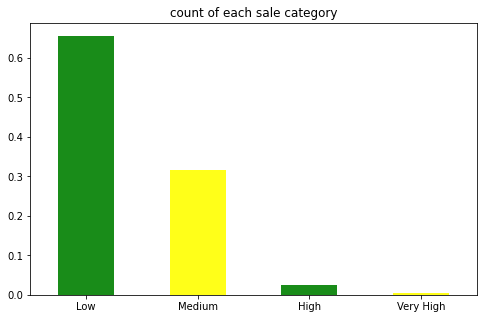

In [1496]:
fig = plt.figure(figsize = (8,5))
house_train.SalePriceCategory.value_counts(normalize = True).plot(kind='bar', color= ['green','yellow'], alpha = 0.9, rot=0)
plt.title('count of each sale category')
plt.show()

In [ ]:
#the above graph shows that maximum houses falls under low price category and the least in very high

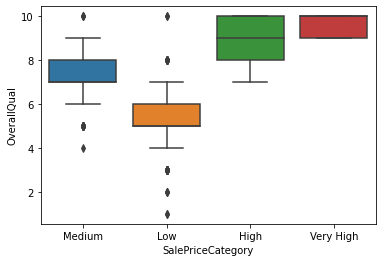

In [1497]:
sns.boxplot(x = 'SalePriceCategory',y='OverallQual',data=house_train)

In [ ]:
#the above graph shows that overall quality increases if SalePriceCategory increases

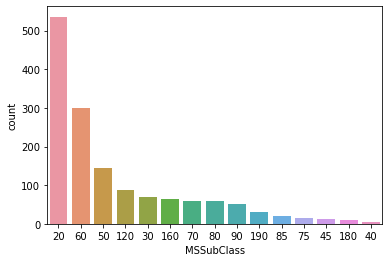

In [1498]:
sns.countplot(x=house_train['MSSubClass'],order =house_train['MSSubClass'].value_counts().index )

In [ ]:
#above graph shows that most of the houses falls under class 20

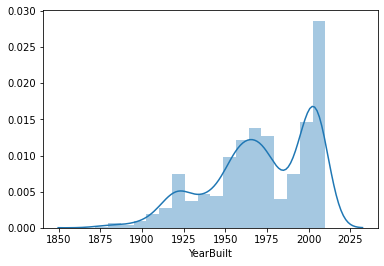

In [1499]:
sns.distplot(house_train['YearBuilt'])

In [ ]:
#above graph shows that most of the houses are built in 2000

# Checking for null values

In [1500]:
house_train.columns[house_train.isnull().any()] #printing columns having null values in training dataset

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [1501]:
#printing sum of all nan values in every column
house_train[house_train.columns[house_train.isnull().any()]].isnull().sum() 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [1502]:
#percentage of missing values in each column in training dataset
house_train[house_train.columns[house_train.isnull().any()]].isnull().sum() * 100 / house_train.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [1503]:
print("No. of columns containing null values")
print(len(house_train.columns[house_train.isna().any()]))

print("No. of columns not containing null values")
print(len(house_train.columns[house_train.notna().all()]))


No. of columns containing null values
19
No. of columns not containing null values
62


# Missing values imputation for train data

In [1504]:
#dropping columns which have more than 80% missing values
house_train.drop(["Alley"],axis=1,inplace=True)
house_train.drop(["PoolQC"],axis=1,inplace=True)
house_train.drop(["Fence"],axis=1,inplace=True)
house_train.drop(["MiscFeature"],axis=1,inplace=True)

In [1505]:
house_train.drop(['Id'], axis=1, inplace=True) #this is not useful as this is serial number and will not affect target variable

# Plotting heatmap to check correlation

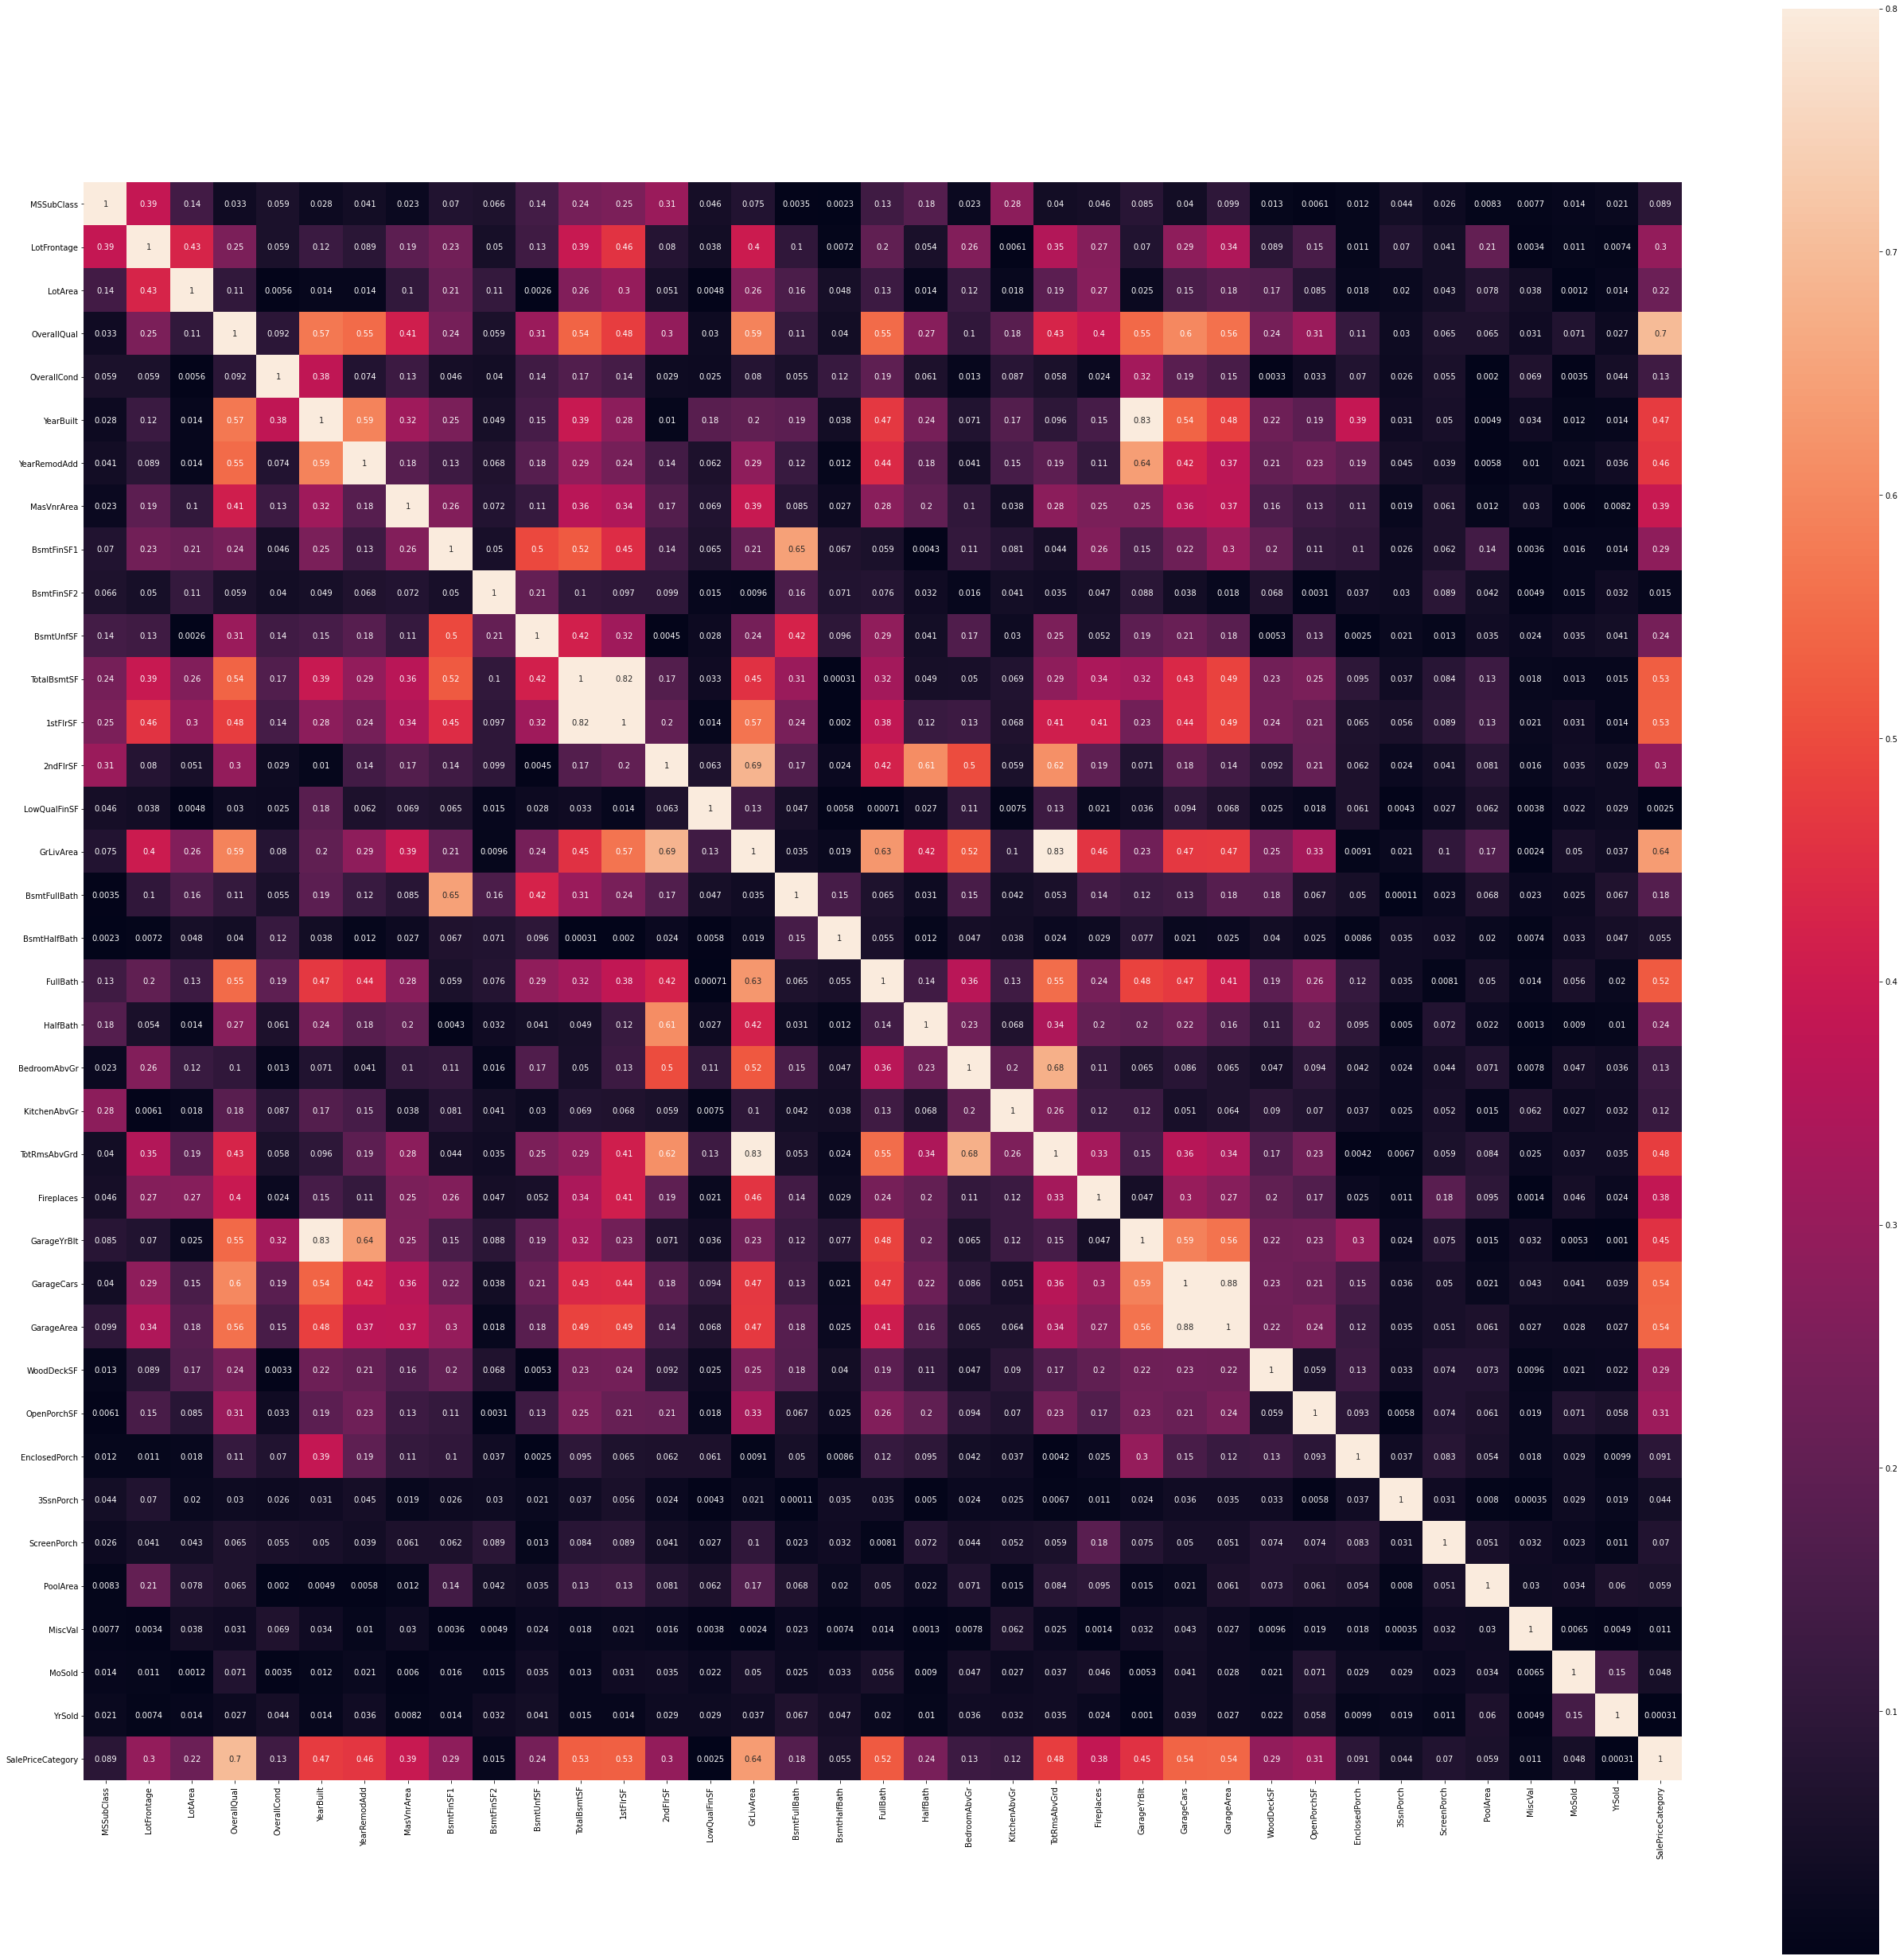

In [1506]:
corrmat = abs(house.corr())
f, ax = plt.subplots(figsize=(45, 45))
sns.heatmap(corrmat, vmax=.8, annot=True,square=True);

In [ ]:
#the variables GarageCars and GarageArea are higly correlated with each other
#the variables TotalBsmtSF,1stFlrSF are highly corelated with each other
#remove one of each pair of variables to remove the effect of multicollinearity

In [1507]:
corr_matrix=abs(house.corr())
print(corr_matrix['SalePriceCategory'].sort_values(ascending=False)) #correlation with target variable

SalePriceCategory    1.000000
OverallQual          0.697077
GrLivArea            0.638305
GarageArea           0.542468
GarageCars           0.540425
1stFlrSF             0.534149
TotalBsmtSF          0.530938
FullBath             0.524298
TotRmsAbvGrd         0.476405
YearBuilt            0.472558
YearRemodAdd         0.464683
GarageYrBlt          0.454307
MasVnrArea           0.392139
Fireplaces           0.382020
OpenPorchSF          0.309502
LotFrontage          0.296902
2ndFlrSF             0.295058
WoodDeckSF           0.291512
BsmtFinSF1           0.285331
HalfBath             0.244854
BsmtUnfSF            0.238040
LotArea              0.221734
BsmtFullBath         0.176772
OverallCond          0.131822
BedroomAbvGr         0.126710
KitchenAbvGr         0.115887
EnclosedPorch        0.091084
MSSubClass           0.088527
ScreenPorch          0.070382
PoolArea             0.059083
BsmtHalfBath         0.055216
MoSold               0.047618
3SsnPorch            0.043502
BsmtFinSF2

In [1508]:
# removing GarageCars as GarageArea is highly corelated to target variable than GarageCars
house_train.drop(["GarageCars"],axis=1,inplace=True)

In [1509]:
#removing  TotalBsmtSF as 1stFlrSF is highly corelated to target variable than TotalBsmtSF
house_train.drop(["TotalBsmtSF"],axis=1,inplace=True)

In [1510]:
# removing GarageYrBlt as it YrSold is giving sufficient information and also imputing nan values by doing this
house_train.drop(["GarageYrBlt"],axis=1,inplace=True)

In [1365]:
#GarageType is missing that could mean there is no Garage
#so filling those values and the missing values of all the other realetd columns to 'none'

In [1511]:
#for categorical variables in train dataset
for col in ('GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'MasVnrType',"FireplaceQu"):
    house_train[col] = house_train[col].fillna('None')

In [1367]:
#  imputing other missing categorical features with mode

In [1512]:
house_train['Electrical'].fillna(house_train['Electrical'].mode()[0], inplace=True)

In [1513]:
house_test['KitchenQual'].fillna(house_test['KitchenQual'].mode()[0], inplace=True)

In [1514]:
house_train["LotFrontage"].skew()

2.163569142324884

In [1515]:
house_train["MasVnrArea"].skew()

2.669084210182863

In [1516]:
#imputing the nan values by median because vaalues are slightly skewed and input values are numerical
house_train['LotFrontage'].fillna(house_train['LotFrontage'].median(), inplace=True)
house_train['MasVnrArea'].fillna(house_train['MasVnrArea'].median(), inplace=True)

In [1517]:
#printing the list of all categorical variables in training dataset
house_train.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'SalePriceCategory']

In [1518]:
#counting the values in each category
house_train['SalePriceCategory'].value_counts()

Low          957
Medium       461
High          37
Very High      5
Name: SalePriceCategory, dtype: int64

In [1519]:
#converting into numerical values by using dictionary
temp = {'Low':1, 'Medium':2,'High':3,'Very High':4}
house_train['SalePriceCategory'] = house_train['SalePriceCategory'].apply(lambda x:temp[x])

In [1520]:
#storing all other categorical variables in one variable
cat_house = house_train.select_dtypes(include=['object']).copy()

In [1521]:
cat_house

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [1522]:
#performing label encoder to conervert catagorical variables into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_house:
    house_train[col] = le.fit_transform(house_train[col])

In [1523]:
house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceCategory
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,2
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,1
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,2
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,1
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,2


In [ ]:
#Calculating Cramer's V statistic to understand corelation between two categorical variable in one dataset

In [1524]:
#importing necessory libraries
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix

In [1525]:
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Crosstab building
    chi2 = chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [1526]:
rows= []

for var1 in cat_house:
    col = []
    for var2 in cat_house :
        cramers =cramers_V(cat_house[var1], cat_house[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = cat_house.columns, index =cat_house.columns)

In [1527]:
df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSZoning,1.00,0.25,0.15,0.10,0.00,0.06,0.07,0.64,0.07,0.06,...,0.17,0.00,0.12,0.21,0.19,0.13,0.10,0.22,0.15,0.14
Street,0.25,0.92,0.03,0.11,0.20,0.00,0.18,0.20,0.16,0.00,...,0.06,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.11,0.10
LotShape,0.15,0.03,1.00,0.13,0.00,0.22,0.12,0.24,0.10,0.00,...,0.09,0.00,0.12,0.14,0.14,0.08,0.05,0.08,0.00,0.00
LandContour,0.10,0.11,0.13,1.00,0.00,0.06,0.46,0.36,0.00,0.06,...,0.10,0.00,0.08,0.12,0.10,0.04,0.00,0.12,0.03,0.11
Utilities,0.00,0.20,0.00,0.00,0.50,0.08,0.00,0.10,0.00,0.00,...,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.13,0.08
LotConfig,0.06,0.00,0.22,0.06,0.08,1.00,0.08,0.14,0.15,0.09,...,0.00,0.00,0.05,0.06,0.03,0.02,0.05,0.03,0.00,0.03
LandSlope,0.07,0.18,0.12,0.46,0.00,0.08,1.00,0.32,0.00,0.00,...,0.04,0.07,0.03,0.11,0.00,0.00,0.00,0.00,0.00,0.04
Neighborhood,0.64,0.20,0.24,0.36,0.10,0.14,0.32,1.00,0.18,0.01,...,0.44,0.08,0.30,0.30,0.42,0.20,0.17,0.31,0.17,0.22
Condition1,0.07,0.16,0.10,0.00,0.00,0.15,0.00,0.18,1.00,0.21,...,0.08,0.00,0.00,0.09,0.12,0.03,0.03,0.10,0.03,0.00
Condition2,0.06,0.00,0.00,0.06,0.00,0.09,0.00,0.01,0.21,1.00,...,0.09,0.00,0.00,0.10,0.00,0.14,0.00,0.06,0.00,0.00


In [1119]:
#plotting heatmap for better understanding

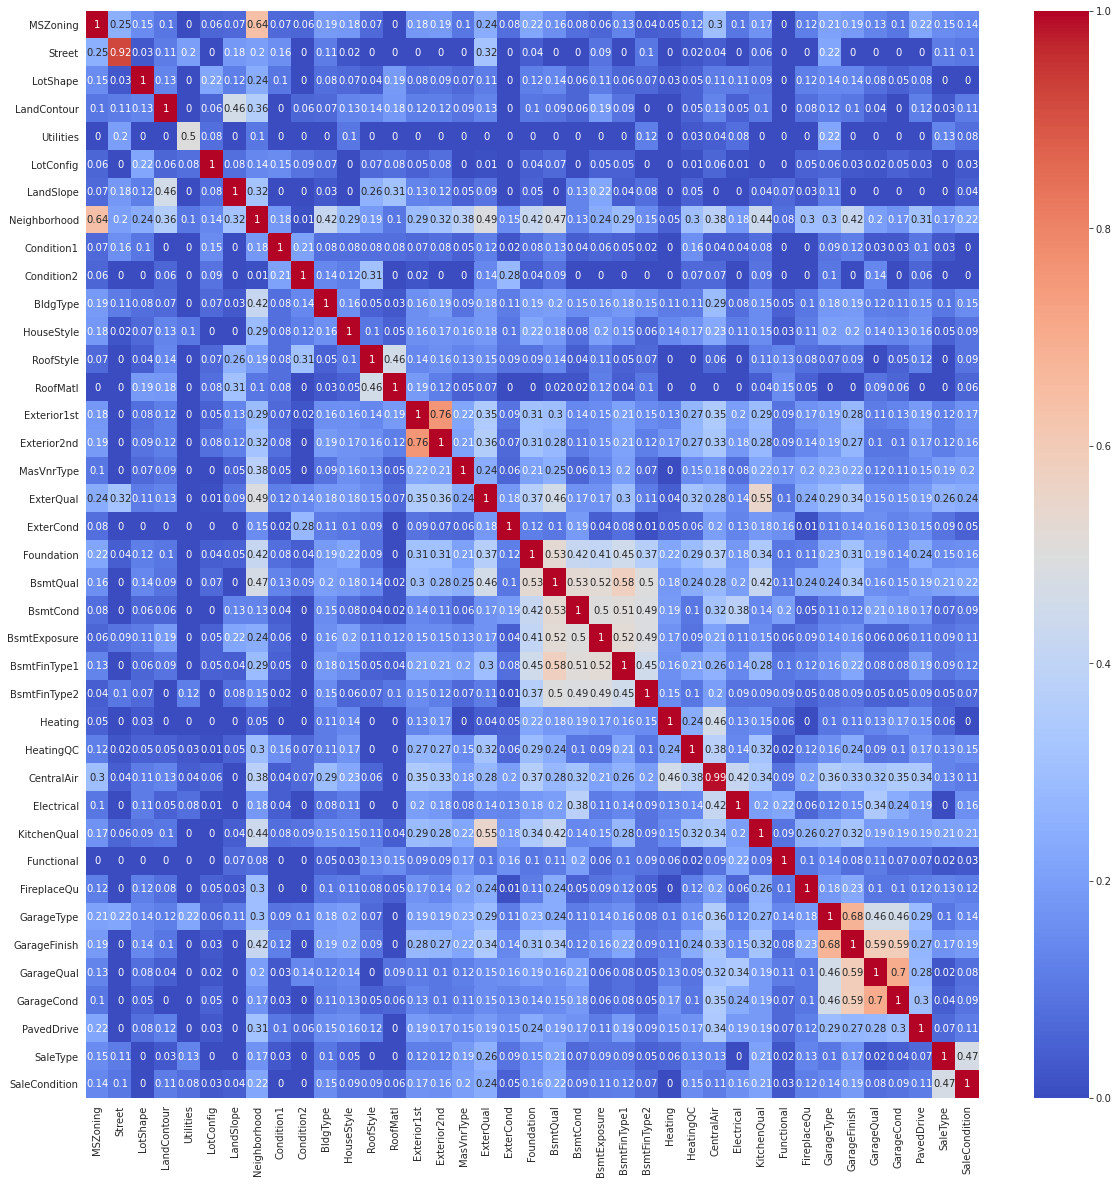

In [1528]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(20,20))
    ax = sns.heatmap(df, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
#pair of variable 'Exterior1st','Exterior2nd' are highly correlated to each other
#pair of variables 'GarageQual','GarageCond' are highly correlated to each other
#remove one of each pair of variables to remove the effect of multicollinearity

In [1529]:
house_train.drop(["Exterior2nd"],axis=1,inplace=True)
house_train.drop(["GarageQual"],axis=1,inplace=True)

In [1530]:
house_train.shape

(1460, 71)

# Feature Selection

In [1531]:
#using ExtraTreeClassifier method to study about the importance of the variables
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 0)

In [1532]:
y_train = house_train['SalePriceCategory'] #storing target variable in y_train

In [1533]:
x_train=house_train.drop(["SalePriceCategory"],axis=1) #storing other remaining variables in x_train

In [1534]:
model.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [1535]:
#printing the importance of all the features in x_train in the form of array
x = model.feature_importances_
x

array([0.01265657, 0.00859107, 0.01352233, 0.01830855, 0.00012492,
       0.01639709, 0.0059668 , 0.        , 0.00674511, 0.00362047,
       0.01481198, 0.00374247, 0.00056421, 0.00717473, 0.00984633,
       0.05748198, 0.00860508, 0.02456552, 0.04020456, 0.00596236,
       0.00242193, 0.01000652, 0.01487529, 0.01125002, 0.05742656,
       0.00336838, 0.01814506, 0.04146949, 0.00381392, 0.01333746,
       0.00886791, 0.01716509, 0.00290949, 0.00399984, 0.01258603,
       0.00095629, 0.02683208, 0.00182658, 0.00224297, 0.03564021,
       0.02912069, 0.00073587, 0.06572086, 0.00855085, 0.00259889,
       0.03406991, 0.01411789, 0.01027548, 0.00238379, 0.04225584,
       0.02211311, 0.0025921 , 0.02456014, 0.01475586, 0.02585377,
       0.03165554, 0.03815788, 0.0030615 , 0.00310816, 0.011676  ,
       0.02095208, 0.00411294, 0.00235877, 0.00420584, 0.0006235 ,
       0.00106165, 0.00928203, 0.0090364 , 0.00533698, 0.0076324 ])

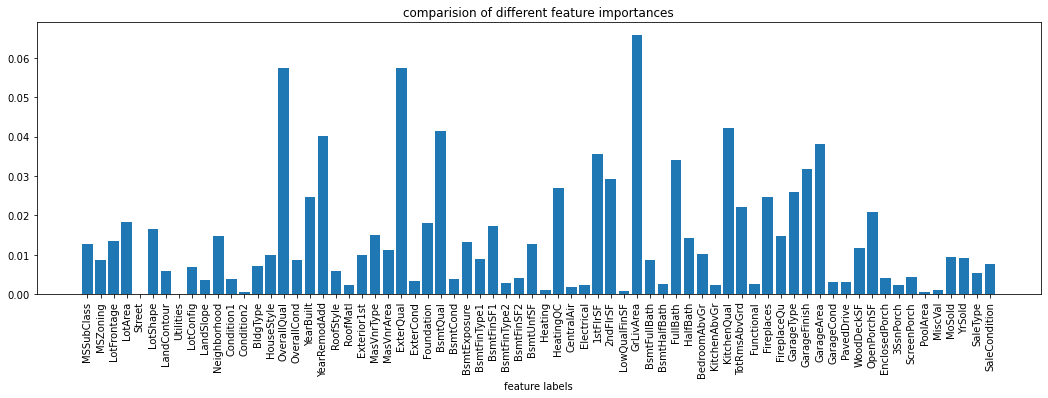

In [1536]:
#plotting the bar graph as it is easy to visualize of the feature importances
f, ax = plt.subplots(figsize=(18,5))
plt.bar(x_train.columns,x)
plt.xticks(rotation=90)
plt.xlabel('feature labels')
plt.title('comparision of different feature importances')
plt.show()

In [1537]:
#taking all variables whose importance is greater than mean importance
idx = np.arange(0, x_train.shape[1])
features_to_keep = idx[x > np.mean(x)]
features_to_keep

array([ 3,  5, 10, 15, 17, 18, 22, 24, 26, 27, 31, 36, 39, 40, 42, 45, 49,
       50, 52, 53, 54, 55, 56, 60])

In [1538]:
x_feature_selected = x_train.iloc[:,features_to_keep] 
x_feature_selected #dataframe of selected features

,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,Foundation,BsmtQual,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,OpenPorchSF
0,8450,3,5,7,2003,2003,1,2,2,2,...,1710,2,2,8,0,3,1,2,548,61
1,9600,3,24,6,1976,1976,2,3,1,2,...,1262,2,3,6,1,5,1,2,460,0
2,11250,0,5,7,2001,2002,1,2,2,2,...,1786,2,2,6,1,5,1,2,608,42
3,9550,0,6,7,1915,1970,2,3,0,4,...,1717,1,2,7,1,2,5,3,642,35
4,14260,0,15,8,2000,2000,1,2,2,2,...,2198,2,2,9,1,5,1,2,836,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,3,8,6,1999,2000,2,3,2,2,...,1647,2,3,7,1,5,1,2,460,40
1456,13175,3,14,6,1978,1988,3,3,1,2,...,2073,2,3,7,2,5,1,3,500,0
1457,9042,3,6,7,1941,2006,2,0,4,4,...,2340,2,2,9,2,2,1,2,252,60
1458,9717,3,12,5,1950,1996,2,3,1,4,...,1078,1,2,5,0,3,1,3,240,0


In [1539]:
x_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   LotShape      1460 non-null   int32
 2   Neighborhood  1460 non-null   int32
 3   OverallQual   1460 non-null   int64
 4   YearBuilt     1460 non-null   int64
 5   YearRemodAdd  1460 non-null   int64
 6   MasVnrType    1460 non-null   int32
 7   ExterQual     1460 non-null   int32
 8   Foundation    1460 non-null   int32
 9   BsmtQual      1460 non-null   int32
 10  BsmtFinSF1    1460 non-null   int64
 11  HeatingQC     1460 non-null   int32
 12  1stFlrSF      1460 non-null   int64
 13  2ndFlrSF      1460 non-null   int64
 14  GrLivArea     1460 non-null   int64
 15  FullBath      1460 non-null   int64
 16  KitchenQual   1460 non-null   int32
 17  TotRmsAbvGrd  1460 non-null   int64
 18  Fireplaces    1460 non-null   int64
 19  FireplaceQu   1460 non-null

In [1540]:
#importing models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF

In [1541]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_keep = scaler.fit_transform(x_feature_selected)

In [1542]:
#splitting the data into train and test to build the bodel and then check accuracy
from sklearn.model_selection import train_test_split
x_traint, x_testt, y_traint, y_testt = train_test_split(x_feature_selected,y_train,test_size=0.30, random_state=2)

In [1543]:
#used kfold cross validation to validate the model
import warnings
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier


warnings.filterwarnings("ignore")
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [1544]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_feature_selected,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBC: 0.906849 (0.015679)
KNN: 0.820548 (0.029188)
CART: 0.870548 (0.028480)
NB: 0.845890 (0.018695)
RF: 0.912329 (0.015857)


In [1545]:
#seperating all the variables which were in x_feature_selection in another variable from test data which is house_test 
#features_to_keep_test will be used to predict target variable
features_to_keep_test=house_test[['LotArea','LotShape','Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtFinSF1','HeatingQC','1stFlrSF',      
   '2ndFlrSF',      
   'GrLivArea',     
   'FullBath',      
   'KitchenQual',   
   'TotRmsAbvGrd',  
   'Fireplaces',    
   'FireplaceQu',   
   'GarageType',    
   'GarageFinish', 
   'GarageArea',    
   'OpenPorchSF']]

In [ ]:
#data cleaning in features_to_keep_test which consists variables from test dataset

In [1546]:
#printing sum of all nan values in every column
features_to_keep_test[features_to_keep_test.columns[features_to_keep_test.isnull().any()]].isnull().sum() 

MasVnrType       16
BsmtQual         44
BsmtFinSF1        1
FireplaceQu     730
GarageType       76
GarageFinish     78
GarageArea        1
dtype: int64

In [1547]:
#percentage of missing values in each column in features_to_keep_test
features_to_keep_test[features_to_keep_test.columns[features_to_keep_test.isnull().any()]].isnull().sum() * 100 / features_to_keep_test.shape[0]

MasVnrType       1.096642
BsmtQual         3.015764
BsmtFinSF1       0.068540
FireplaceQu     50.034270
GarageType       5.209047
GarageFinish     5.346127
GarageArea       0.068540
dtype: float64

In [1548]:
##for categorical variables in train dataset
for col in ('GarageType', 'GarageFinish', 'BsmtQual','FireplaceQu','MasVnrType'):
    features_to_keep_test[col] = features_to_keep_test[col].fillna('None')

In [1549]:
features_to_keep_test["GarageArea"].fillna(0, inplace = True) #filling no garage area with 0

In [1550]:
features_to_keep_test["BsmtFinSF1"].fillna(0, inplace = True) #filling no Type 1 finished square feet with 0

In [1551]:
features_to_keep_test.isna().sum() #checking nan values again and now no nan value is there

LotArea         0
LotShape        0
Neighborhood    0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtFinSF1      0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageArea      0
OpenPorchSF     0
dtype: int64

In [1552]:
#converting categorical variables into numeric
for col_name in features_to_keep_test.columns:
    if(features_to_keep_test[col_name].dtype == 'object'):
        features_to_keep_test[col_name]= features_to_keep_test[col_name].astype('category')
        features_to_keep_test[col_name] = features_to_keep_test[col_name].cat.codes

In [1553]:
features_to_keep_test.head()

,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,Foundation,BsmtQual,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,OpenPorchSF
0,11622,3,12,5,1961,1961,2,3,1,4,...,896,1,3,5,0,3,1,3,730.0,0
1,14267,0,12,6,1958,1958,1,3,1,4,...,1329,1,2,6,0,3,1,3,312.0,36
2,13830,0,8,5,1997,1998,2,3,2,2,...,1629,2,3,6,1,5,1,0,482.0,34
3,9978,0,8,6,1998,1998,1,3,2,4,...,1604,2,2,7,1,2,1,0,470.0,36
4,5005,0,22,8,1992,1992,2,2,2,2,...,1280,2,2,5,0,3,1,2,506.0,82


In [1554]:
#fitting the model with RandomForest as it has highest accuracy among all
model_RF= RandomForestClassifier()
model_RF.fit(x_feature_selected,y_train)

RandomForestClassifier()

In [1555]:
y_f_pred = model_RF.predict(features_to_keep_test) #predict target variable

In [1556]:
y_f_pred #array of the predicted values

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [1557]:
p=y_f_pred.tolist() #converting into list

In [1558]:
np.array(np.unique(y_f_pred,return_counts=True)).T #checking count of each category

array([[   1, 1006],
       [   2,  422],
       [   3,   31]], dtype=int64)